##### Filip Stefaniuk fs361039
# Assigmnent 3

In [5]:
import matplotlib.pyplot as plt
import brackets
from models.lstm_2_layer import RNNModel
import tensorflow as tf
import numpy as np

## Data Generator

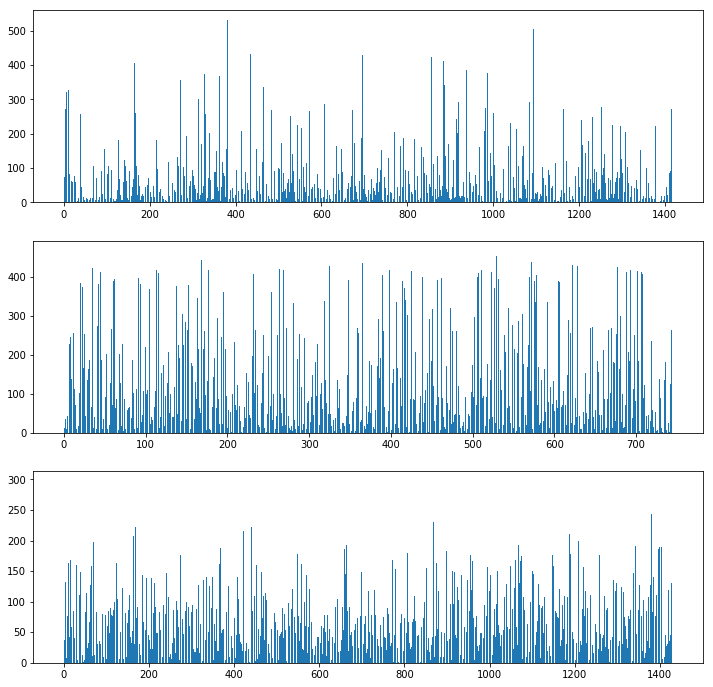

In [15]:
n = 8

bs = {}
bs2 = {}
bs3 = {}

for i in range(100000):
    b = brackets.random_bracket(n)
    bs[b] = bs.get(b, 0) + 1
    
    b2 = brackets.random_bracket_heuristic(n)
    bs2[b2] = bs2.get(b2, 0) + 1
    
    
    b3 = brackets.random_bracket_joined(n, h=0.5, q=0.9)
    bs3[b3] = bs3.get(b3, 0) + 1
#     bs3[b] = bs3.get(b, 0) + 1
#     bs3[b2] = bs3.get(b2, 0) + 1
plt.figure(figsize=(12, 12))

plt.subplot(3, 1, 1)
plt.bar(range(len(bs)), list(bs.values()))
# plt.xticks(range(len(bs)), list(bs.keys()))

plt.subplot(3, 1, 2)
plt.bar(range(len(bs2)), list(bs2.values()))
# plt.xticks(range(len(bs2)), list(bs2.keys()))

plt.subplot(3, 1, 3)
plt.bar(range(len(bs3)), list(bs3.values()))
# plt.xticks(range(len(bs3)), list(bs3.keys()))
plt.show()

## Models

In [6]:
def train(model, n, batch_size=32):

    accs = []
    losses = []
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        sess.run(tf.tables_initializer())
        sess.run(tf.local_variables_initializer())
        
        for step in range(10000):
            data_x, data_y = brackets.next_batch(batch_size, n)
            
            _, loss, acc = sess.run([model.train_step, model.loss, model.acc], feed_dict={model.x: data_x, model.y: data_y})
            
            accs.append(acc)
            losses.append(loss)
            
            if step % 100 == 0:
                print('Step {step}: loss {loss}, mean_loss {mean_loss}'.format(
                step=step, loss=loss, mean_loss=np.mean(losses[-200:])))
                
                print('Accuracy: {acc}'.format(
                acc=np.mean(accs[-200:], axis=0)))

            
    return losses

In [7]:
model = RNNModel()

/home/filip/.conda/envs/tf35/lib/python3.5/site-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [8]:
losses = train(model, 5)

plt.plot(losses)
plt.show()

Step 0: loss 11.455763816833496, mean_loss 11.455763816833496
Accuracy: [0. 0. 0.]
Step 100: loss 5.70293664932251, mean_loss 10.165874481201172
Accuracy: [0.0105198  0.00959158 0.07209159]
Step 200: loss 1.2128479480743408, mean_loss 6.163788318634033
Accuracy: [0.18015625 0.18       0.126875  ]
Step 300: loss 1.1706634759902954, mean_loss 1.75984525680542
Accuracy: [0.43125   0.4134375 0.2009375]
Step 400: loss 0.8267404437065125, mean_loss 1.205460548400879
Accuracy: [0.535625  0.4828125 0.215625 ]
Step 500: loss 0.5297651886940002, mean_loss 0.9150803089141846
Accuracy: [0.5971875 0.531875  0.225625 ]
Step 600: loss 0.48714789748191833, mean_loss 0.6468040347099304
Accuracy: [0.68828124 0.6015625  0.26578125]
Step 700: loss 0.5596528649330139, mean_loss 0.5181146264076233
Accuracy: [0.76375    0.63234377 0.29390624]
Step 800: loss 0.3816494941711426, mean_loss 0.5030272006988525
Accuracy: [0.7785938 0.6382812 0.2959375]
Step 900: loss 0.5017013549804688, mean_loss 0.488636046648025

KeyboardInterrupt: 

/home/filip/.conda/envs/tf35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


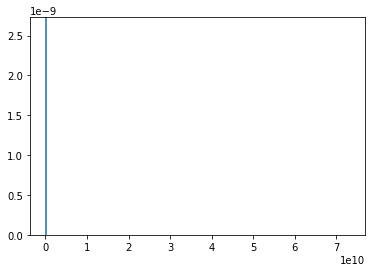

In [62]:
# beta = 1

# Y = np.random.exponential(beta, 50000)
Y = np.random.zipf(1.4, 1000)
# print(Y)
plt.hist(Y, normed=True, bins=200,lw=0,alpha=.8)
# plt.plot([0,max(Y)],[target,target],'r--')
# plt.ylim(0,target*1.1)
plt.show()



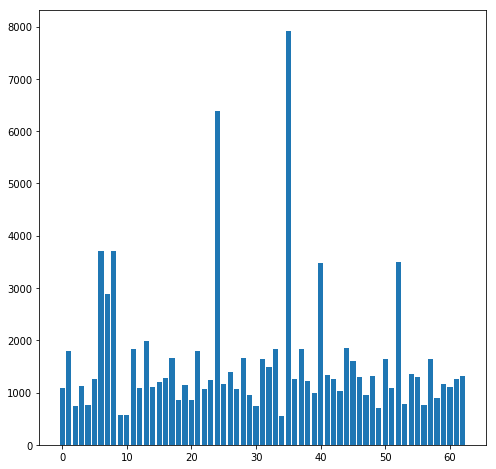

In [10]:
N = 5

bs4 = {}

for i in range(100000):
    b4 = brackets.random_bracket_len(N)
    bs4[b4] = bs4.get(b4, 0) + 1

plt.figure(figsize=(8, 8))

plt.bar(range(len(bs4)), list(bs4.values()))
# plt.xticks(range(len(bs4)), list(bs4.keys()))
plt.show()